In [1]:
import numpy as np
import pandas as pd

In [2]:
from keras import layers
from keras import models

Using TensorFlow backend.


In [3]:
from keras.datasets import imdb

In [5]:
(train_data,train_labels),(test_data,test_labels)=imdb.load_data(num_words=10000)


In [6]:
train_data[0]

[1,
 14,
 22,
 16,
 43,
 530,
 973,
 1622,
 1385,
 65,
 458,
 4468,
 66,
 3941,
 4,
 173,
 36,
 256,
 5,
 25,
 100,
 43,
 838,
 112,
 50,
 670,
 2,
 9,
 35,
 480,
 284,
 5,
 150,
 4,
 172,
 112,
 167,
 2,
 336,
 385,
 39,
 4,
 172,
 4536,
 1111,
 17,
 546,
 38,
 13,
 447,
 4,
 192,
 50,
 16,
 6,
 147,
 2025,
 19,
 14,
 22,
 4,
 1920,
 4613,
 469,
 4,
 22,
 71,
 87,
 12,
 16,
 43,
 530,
 38,
 76,
 15,
 13,
 1247,
 4,
 22,
 17,
 515,
 17,
 12,
 16,
 626,
 18,
 2,
 5,
 62,
 386,
 12,
 8,
 316,
 8,
 106,
 5,
 4,
 2223,
 5244,
 16,
 480,
 66,
 3785,
 33,
 4,
 130,
 12,
 16,
 38,
 619,
 5,
 25,
 124,
 51,
 36,
 135,
 48,
 25,
 1415,
 33,
 6,
 22,
 12,
 215,
 28,
 77,
 52,
 5,
 14,
 407,
 16,
 82,
 2,
 8,
 4,
 107,
 117,
 5952,
 15,
 256,
 4,
 2,
 7,
 3766,
 5,
 723,
 36,
 71,
 43,
 530,
 476,
 26,
 400,
 317,
 46,
 7,
 4,
 2,
 1029,
 13,
 104,
 88,
 4,
 381,
 15,
 297,
 98,
 32,
 2071,
 56,
 26,
 141,
 6,
 194,
 7486,
 18,
 4,
 226,
 22,
 21,
 134,
 476,
 26,
 480,
 5,
 144,
 30,
 5535,
 18,

In [7]:
max_no = max([max(x) for x in train_data])
max_no

9999

In [9]:
#to convert train_label into one hot encoding
def one_hot(train_data,features=10000):
    result = np.zeros((train_data.shape[0],features))
    for i,seq in enumerate(train_data):
        result[i,seq] = 1
    return result

In [10]:
encoded_train = one_hot(train_data)

In [45]:
model = models.Sequential()
model.add(layers.Dense(16, activation='relu',input_shape=(10000,)))
model.add(layers.Dense(16, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

In [46]:
model.compile(optimizer='rmsprop', loss='binary_crossentropy',metrics=['acc'])

In [37]:
encoded_train_val = encoded_train[:10000]
encoded_train_train = encoded_train[10000:]
#vectorizing train labels
train_labels = np.asarray(train_labels).astype('float32')
train_labels_val = train_labels[:10000]
train_labels_train = train_labels[10000:]

In [38]:
result = model.fit(encoded_train_train,train_labels_train,epochs=10,batch_size=512,validation_data=[encoded_train_val,train_labels_val])

Train on 15000 samples, validate on 10000 samples
Epoch 1/10
15000/15000 [==============================] - 20s 1ms/step - loss: 0.5326 - acc: 0.7916 - val_loss: 0.4060 - val_acc: 0.8698
Epoch 2/10
15000/15000 [==============================] - 5s 317us/step - loss: 0.3257 - acc: 0.8987 - val_loss: 0.3153 - val_acc: 0.8853
Epoch 3/10
15000/15000 [==============================] - 4s 295us/step - loss: 0.2356 - acc: 0.9244 - val_loss: 0.2826 - val_acc: 0.8901
Epoch 4/10
15000/15000 [==============================] - 5s 305us/step - loss: 0.1867 - acc: 0.9396 - val_loss: 0.2861 - val_acc: 0.8839
Epoch 5/10
15000/15000 [==============================] - 4s 296us/step - loss: 0.1503 - acc: 0.9519 - val_loss: 0.2768 - val_acc: 0.8888
Epoch 6/10
15000/15000 [==============================] - 4s 294us/step - loss: 0.1258 - acc: 0.9613 - val_loss: 0.3129 - val_acc: 0.8795
Epoch 7/10
15000/15000 [==============================] - 4s 297us/step - loss: 0.1047 - acc: 0.9685 - val_loss: 0.3116 - v

In [39]:
history = result.history
history['val_loss']

[0.40603984861373904,
 0.31527689533233644,
 0.28260789179801943,
 0.2860630591869354,
 0.27684296832084654,
 0.31293994336128234,
 0.3115653853416443,
 0.32128802351951596,
 0.354228445148468,
 0.3967072114467621]

In [22]:
import matplotlib.pyplot as plt

In [40]:
val_loss = history['val_loss']
loss = history['loss']

In [41]:
epoch = np.arange(1,len(val_loss)+1)
print(epoch)

[ 1  2  3  4  5  6  7  8  9 10]


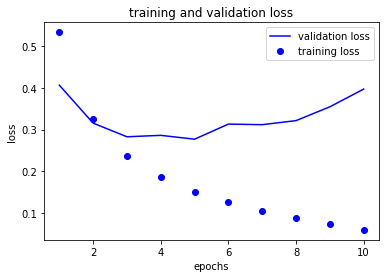

In [42]:
plt.plot(epoch,val_loss,'b',label='validation loss')
plt.plot(epoch,loss,'bo',label='training loss')
plt.title('training and validation loss')
plt.xlabel('epochs')
plt.ylabel('loss')
plt.legend()

upto 5 epochs validation loss reduces to its lowest, so let's train our network till 5 epochs

In [47]:
result = model.fit(encoded_train_train,train_labels_train,epochs=5,batch_size=512,validation_data=[encoded_train_val,train_labels_val])

Train on 15000 samples, validate on 10000 samples
Epoch 1/5
15000/15000 [==============================] - 15s 992us/step - loss: 0.5015 - acc: 0.7933 - val_loss: 0.3799 - val_acc: 0.8653
Epoch 2/5
15000/15000 [==============================] - 5s 302us/step - loss: 0.2990 - acc: 0.9042 - val_loss: 0.3143 - val_acc: 0.8814
Epoch 3/5
15000/15000 [==============================] - 4s 283us/step - loss: 0.2148 - acc: 0.9317 - val_loss: 0.3092 - val_acc: 0.8773
Epoch 4/5
15000/15000 [==============================] - 5s 300us/step - loss: 0.1708 - acc: 0.9449 - val_loss: 0.2828 - val_acc: 0.8875
Epoch 5/5
15000/15000 [==============================] - 4s 287us/step - loss: 0.1420 - acc: 0.9547 - val_loss: 0.2830 - val_acc: 0.8876


# Testing this model on our test set

In [48]:
test_data = one_hot(test_data)
test_labels = np.asarray(test_labels).astype('float32')
score = model.evaluate(test_data,test_labels)
score

25000/25000 [==============================] - 7s 277us/step


[0.30228790855407717, 0.87956]

This simple NN of 2 hidden layers of size 16 achieves accuracy of 87.9% which is fairly good for this naive network. It could reach upto 95% with more complex NN archietecture